In [1]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from lib.envs.GridEnv import Env
from lib.utils.draw import show_grid,show_policy


In [2]:
def policy_evaluation(policy,env,gamma=1.0,theta= 0.001):
    """
    arg:
        policy:  策略函数
        env:     环境
        gamma:   折扣回报率
        theta:   确定 v_k 与 v_k+1 的收敛
    """
    V = np.zeros(env.observation_size)
    while True:
        delta = 0
        
        for s in range(env.observation_size):
            v = 0 
            for a,action_prob in enumerate(policy[s]):
                for next_state, reward, done in env.P[s][a]:
                    v += action_prob * ( reward + gamma * V[next_state] )
            delta = max(delta,abs(v - V[s]))
            # print(s,v)
            V[s] = v
        # stop 
        # print(delta)
        if delta < theta:
            break
    return np.array(V)


In [3]:
def get_action_value(env,state,V,gamma=1.0):
    q_val = np.zeros(env.action_size)
    for a in range(env.action_size):
        for next_state, reward, done in env.P[state][a]:
            q_val[a] = reward + gamma * V[next_state]
    
    return q_val

In [4]:
def policy_iterator_state(env,gamma=1.0,theta= 0.00001):
    
    # 随机策略
    policy = np.ones( (env.observation_size,env.action_size) ) / env.action_size
    
    while True:
        
        # 策略是否收敛了 （上一轮的迭代和这一轮的没变化）
        policy_stable  = True
        V = policy_evaluation(policy,env,gamma,theta)
        
        for s in range(env.observation_size):
            chosen_action = np.argmax(policy[s])
            
            # 计算 action value ,最优贝尔曼公式
            action_value = get_action_value(env,s,V,gamma)
            best_action = np.argmax(action_value)    
            if chosen_action != best_action:
                policy_stable = False
            
            # 更新策略，独热编码
            policy[s] = np.eye(env.action_size)[best_action]
        
        if policy_stable:
            return policy, V
    

原始图像


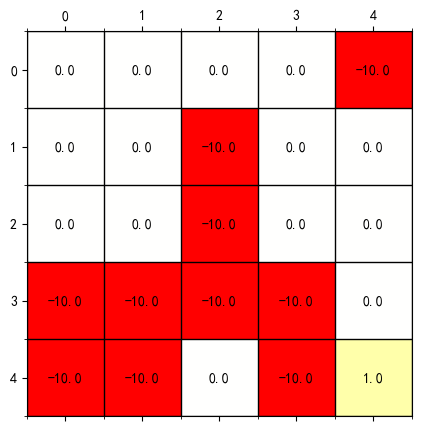

state value function


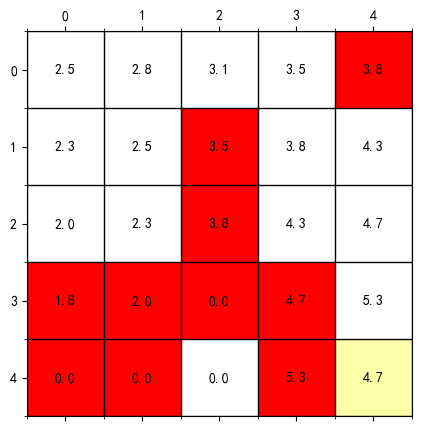

policy


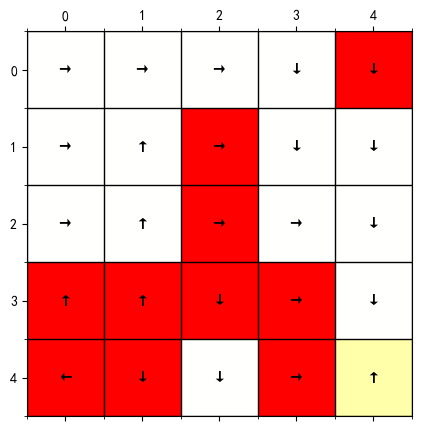

In [5]:
env = Env((5,5),p=0.5,seed=5,punish=-10)
policy, V = policy_iterator_state(env,gamma=0.9)
print("原始图像")
show_grid(env,env.grid)
print("state value function")
show_grid(env,V)
print("policy")
show_policy(env,policy)